In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

# Visualization Seaborn & Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
#Disabling the warnings
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/diabetes/diabetes.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
cdf = df.copy()

In [6]:
cdf.Pregnancies.value_counts()

1     356
0     301
2     284
3     195
4     191
5     141
6     131
7     100
8      96
9      70
10     54
11     24
12     23
13     22
14      7
17      3
15      2
Name: Pregnancies, dtype: int64

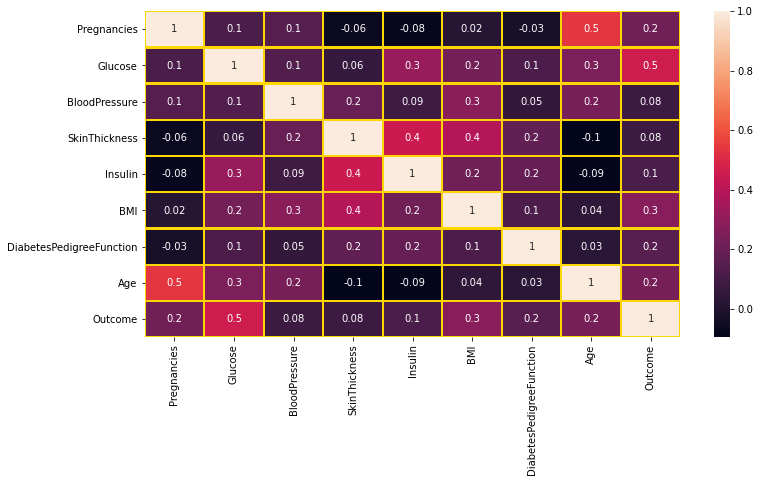

In [7]:
plt.figure(figsize = (12,6)) 
sns.heatmap(cdf.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

In [8]:
cdf.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

In [9]:
cdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
print("satir ve sutun=",cdf.shape)
print("boyut sayisi = ",cdf.ndim)
print("boyut sayisi = ",cdf.ndim)

satir ve sutun= (2000, 9)
boyut sayisi =  2
boyut sayisi =  2


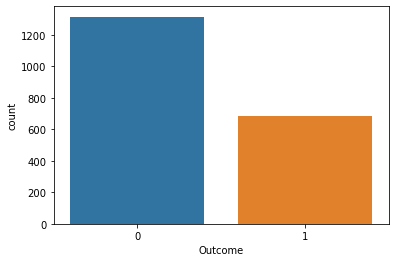

In [11]:
sns.countplot(cdf.Outcome);

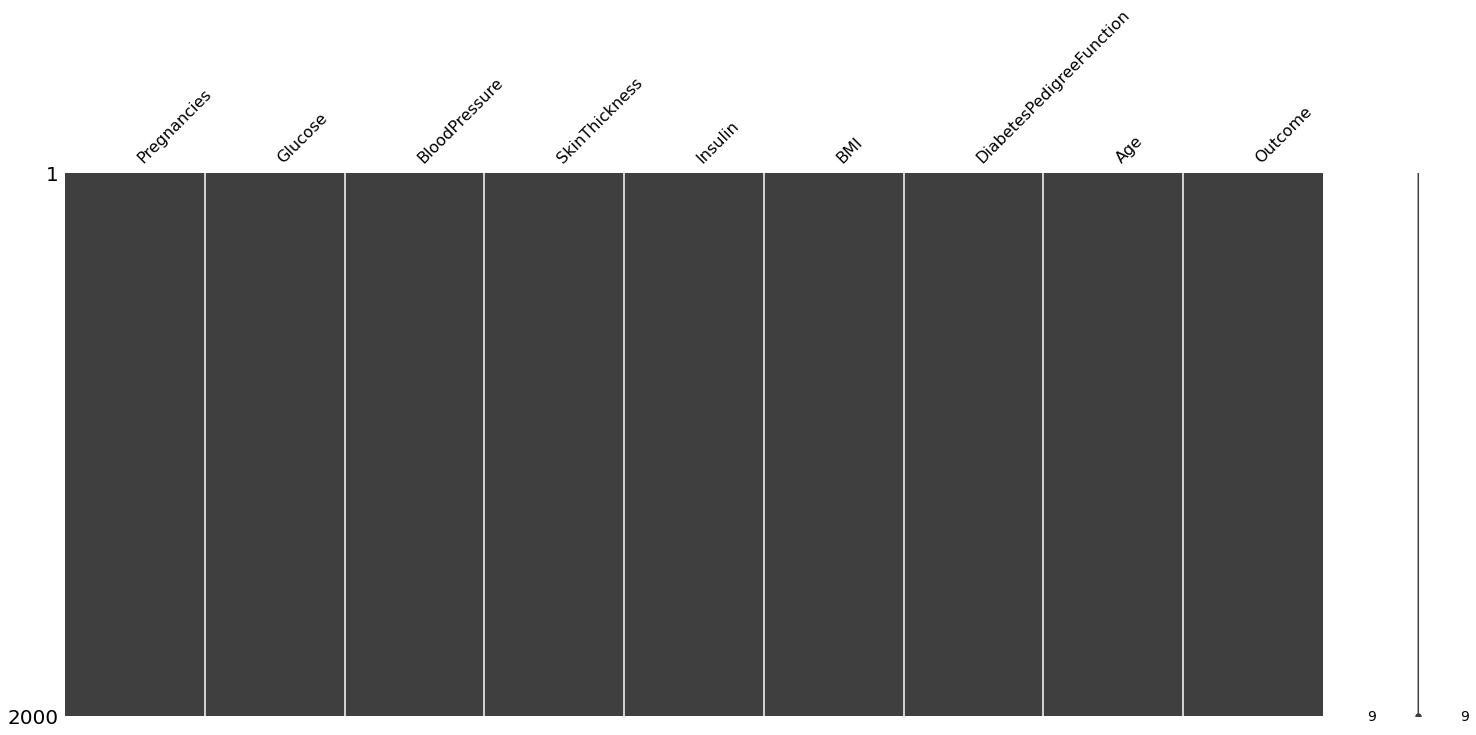

In [12]:
import missingno as msno
msno.matrix(cdf);

In [13]:
x = cdf.drop(["Outcome"],axis = 1) #independent value

In [14]:
y = cdf.Outcome

### Normalization

### PCA,Standart Scaler, Preprocessing etc.

In [15]:
x = (x-np.min(x))/(np.max(x)-np.min(x)).values

In [16]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000


## Train-test splitting

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### Model Selection

# 1) Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_reg = LogisticRegression().fit(x_train,y_train)
log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
log_reg.intercept_
log_reg.coef_

array([[ 1.74686148,  5.44246395, -0.74305487,  0.60264116, -0.60838052,
         4.14201868,  1.28469503,  0.95909992]])

In [21]:
y_pred = log_reg.predict(x_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0])

### Proba values - probability

In [22]:
y_probs = log_reg.predict_proba(x_test)[:,1]

In [23]:
y_pred = [1 if i >0.45 else 0 for i in y_probs]
y_pred[:10]

[1, 0, 1, 1, 1, 1, 0, 0, 0, 0]

In [24]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.79


#### Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score


In [26]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.79


In [27]:
confusion_matrix(y_test,y_pred)

array([[229,  24],
       [ 60,  87]])

In [28]:
y_pred = [1 if i >0.52 else 0 for i in y_probs]
y_pred[:10]


[0, 0, 1, 0, 1, 1, 0, 0, 0, 0]

## 2) Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
r_for = RandomForestClassifier().fit(x_train,y_train)
r_for

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = r_for.predict(x_test)

In [32]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.99

#### Importance

Text(0.5, 0, 'Değişken Önem Düzeyleri')

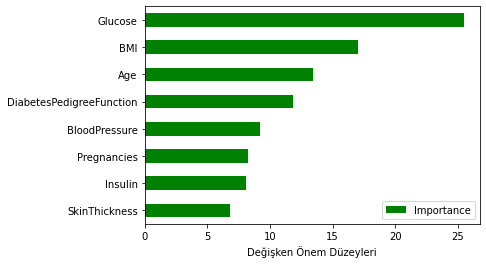

In [33]:
Importance = pd.DataFrame({"Importance": r_for.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Değişken Önem Düzeyleri")

## 3) KNN model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
y_pred = knn.predict(x_test)

In [37]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.845

In [38]:
confusion_matrix(y_test,y_pred)

array([[227,  26],
       [ 36, 111]])

### Model Tuning

In [39]:
knn_params = {"n_neighbors":np.arange(1,50)}

In [40]:
knn =KNeighborsClassifier()
knn_cv = GridSearchCV(knn,knn_params,cv = 10)
knn_cv = knn_cv.fit(x_train,y_train)

In [41]:
print("Best Score:"+str(knn_cv.best_score_))
print("Best Parameters:"+str(knn_cv.best_params_))

Best Score:0.9549999999999998
Best Parameters:{'n_neighbors': 1}


In [42]:
knn_final = KNeighborsClassifier(n_neighbors=1)
knn_final.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [43]:
y_pred = knn_final.predict(x_test)
knn_fscore = accuracy_score(y_test,y_pred)
knn_fscore

0.9775

In [44]:
confusion_matrix(y_test,y_pred)

array([[246,   7],
       [  2, 145]])

## 4) SVM - Support Vector Machine

In [45]:
from sklearn.svm import SVC

In [46]:
svm_model = SVC(C=5,degree=9,kernel = 'poly').fit(x_train,y_train)
svm_model

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
y_pred = svm_model.predict(x_test)
svm_score = accuracy_score(y_test,y_pred)
svm_score

0.9475

In [48]:
confusion_matrix(y_test,y_pred)

array([[244,   9],
       [ 12, 135]])

## 5) Gaussian Naive Bayes Model

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
nb_model.predict(x_test)[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [51]:
nb_model.predict_proba(x_test)[0:10]  


array([[0.0711483 , 0.9288517 ],
       [0.98180758, 0.01819242],
       [0.04796306, 0.95203694],
       [0.5057418 , 0.4942582 ],
       [0.32324964, 0.67675036],
       [0.39255867, 0.60744133],
       [0.50998779, 0.49001221],
       [0.88900817, 0.11099183],
       [0.93641572, 0.06358428],
       [0.77473197, 0.22526803]])

In [52]:
y_pred = nb_model.predict(x_test)
nb_score = accuracy_score(y_test, y_pred)
print("NB_class_SCORE = ", nb_score)  

NB_class_SCORE =  0.7775


In [53]:
cross_val_score(nb_model, x_test, y_test, cv = 20).mean()  

0.765

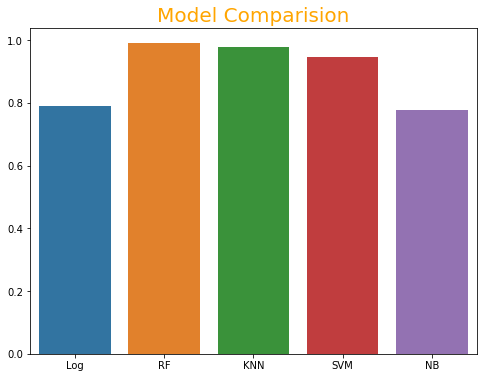

In [54]:
indexx = ["Log","RF","KNN","SVM","NB"]
regressions = [log_score,rf_score,knn_fscore,svm_score,nb_score]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);


In [55]:
indexx = ["Log","RF","KNN","SVM","NB"]
regressions = [log_score,rf_score,knn_fscore,svm_score,nb_score]

import plotly.express as px

fig = px.pie(df, values=regressions, names=indexx, title='Regression Score Results')
fig.show()